In [41]:
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-11-07 06:56:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 192.178.155.207, 172.253.62.207, 192.178.218.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|192.178.155.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   190MB/s    in 0.5s    

2025-11-07 06:56:09 (190 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
zip_ref =zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [5]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [6]:
base_dir = "pizza_steak"
print(os.listdir(base_dir))

['test', 'train']


In [7]:
for dirpath,dirnames,filenames in os.walk(base_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [9]:
# A function to visualize images
def view_random_image(target_dir,target_class):
  #Get a list of all target class images
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)

  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (341, 512, 3)


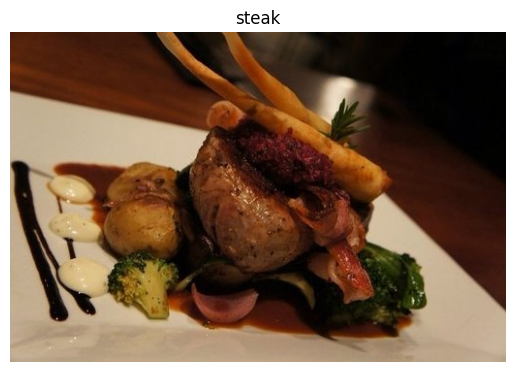

In [10]:
img=view_random_image(target_dir="pizza_steak/train/",target_class="steak")

array([[[ 68,  26,  10],
        [ 70,  28,  12],
        [ 73,  30,  14],
        ...,
        [  3,   3,   1],
        [  3,   3,   1],
        [  3,   3,   1]],

       [[ 68,  26,  10],
        [ 69,  27,  11],
        [ 71,  28,  12],
        ...,
        [  3,   3,   1],
        [  3,   3,   1],
        [  3,   3,   1]],

       [[ 71,  28,  12],
        [ 70,  27,  11],
        [ 70,  27,  10],
        ...,
        [  3,   3,   1],
        [  3,   3,   1],
        [  3,   3,   1]],

       ...,

       [[185, 163, 139],
        [185, 163, 139],
        [186, 164, 140],
        ...,
        [182, 162, 135],
        [182, 162, 135],
        [182, 162, 135]],

       [[182, 160, 136],
        [183, 161, 137],
        [184, 162, 138],
        ...,
        [182, 162, 135],
        [182, 162, 135],
        [182, 162, 135]],

       [[182, 160, 136],
        [182, 160, 136],
        [183, 161, 137],
        ...,
        [182, 162, 135],
        [182, 162, 135],
        [182, 162, 135]]], dtype=uint8)
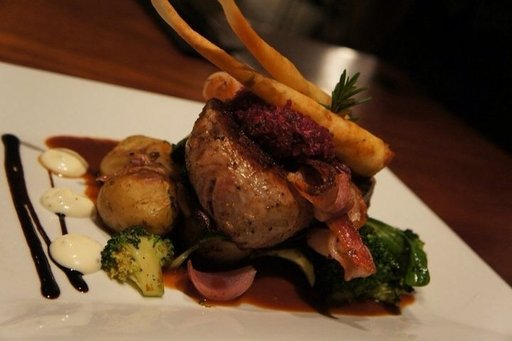

In [11]:
img

In [12]:
img.shape

(341, 512, 3)

In [15]:
tf.random.set_seed(42)

In [17]:
train_data_gen=ImageDataGenerator(rescale=1./255)
test_data_gen=ImageDataGenerator(rescale=1./255)
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

In [18]:
train_data=train_data_gen.flow_from_directory(train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42
                                              )

Found 1500 images belonging to 2 classes.


In [21]:
test_data=train_data_gen.flow_from_directory(test_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            seed=42,

                                            )

Found 500 images belonging to 2 classes.


In [23]:
model_one=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(8,activation="relu"),

    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [24]:
model_one.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │     1,204,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,204,313 (4.59 MB)

 Trainable params: 1,204,313 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model_one.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

In [26]:
history_one=model_one.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.6560 - loss: 1.0509 - val_accuracy: 0.7860 - val_loss: 0.4649
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.7829 - loss: 0.4816 - val_accuracy: 0.7380 - val_loss: 0.5138
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - accuracy: 0.7557 - loss: 0.5518 - val_accuracy: 0.7880 - val_loss: 0.4507
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.7772 - loss: 0.4622 - val_accuracy: 0.7880 - val_loss: 0.4485
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.7956 - loss: 0.4470 - val_accuracy: 0.7500 - val_loss: 0.5435


In [27]:
loss,accuracy=model_one.evaluate(test_data)
print(f'Test Accuracy: {accuracy}')
print(f'Test loss: {loss}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.7420 - loss: 0.5477
Test Accuracy: 0.75
Test loss: 0.5435400009155273


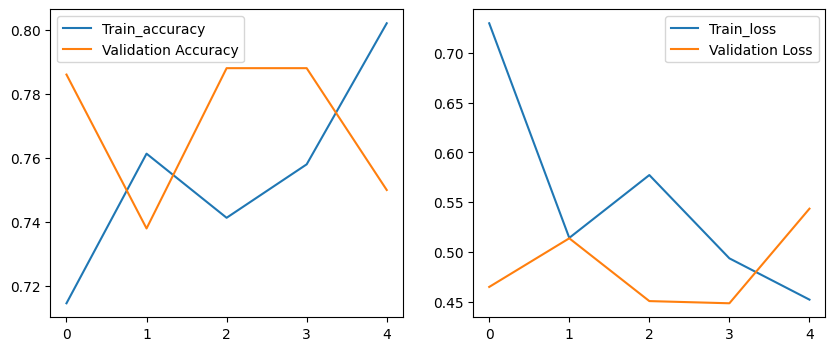

In [30]:
#plot Accuracy and Loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_one.history['accuracy'],label='Train_accuracy')
plt.plot(history_one.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_one.history['loss'],label='Train_loss')
plt.plot(history_one.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

In [35]:
from tensorflow.keras.utils import load_img,img_to_array
img_sample=load_img("/content/sample_data/download (3).jpg",target_size=(224,224))
img_sample=img_to_array(img_sample)
img_sample=img_sample/255.
prediction=model_one.predict(tf.expand_dims(img_sample,axis=0))
class_names=["pizza","steak"]
predict_class=class_names[int(tf.round(prediction[0][0]))]
print("Image Entered by you is likely a ",predict_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image Entered by you is likely a  pizza


In [37]:
#Write a function to take image from user and display with label whether its a pizza or steak using model1_ one

Saving download (3).jpg to download (3) (3).jpg
File Uploaded: download (3) (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction :  Pizza
Confidence :  84.8309 %


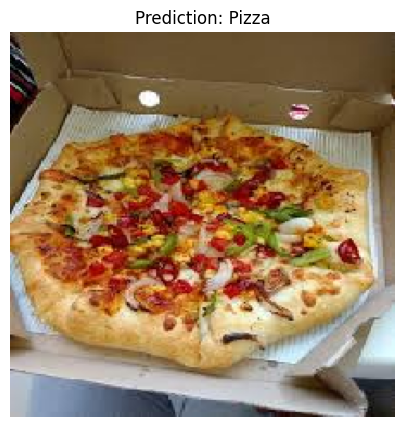

In [43]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  img_path=fn
  print('File Uploaded:',img_path)
  img=image.load_img(img_path,target_size=(224,224))
  img_array=image.img_to_array(img)
  img_array=np.expand_dims(img_array,axis=0)/255.0

  pred=model_one.predict(img_array)[0][0]
  label="Pizza" if pred<0.5 else "Steak"
  print("Prediction : ",label)
  print("Confidence : ",100*(1-pred) if pred<0.5 else 100*pred,"%")

  plt.figure(figsize=(5,5))
  plt.imshow(img)
  plt.title(f"Prediction: {label}")
  plt.axis('off')
  plt.show()